Сресдтва для подсчета различных метрик моделей машинного обучения представлены в модуле [scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html).

Импортируем необходимые методы:

In [5]:
from sklearn.metrics import confusion_matrix # Матрица ошибок
from sklearn.metrics import classification_report # Матрица метрик
from sklearn.metrics import ConfusionMatrixDisplay  # "Цветная" матрица ошибок

import matplotlib.pyplot as plt  # Средство визуализации данных и построения графиков

SyntaxError: invalid syntax (2594159720.py, line 1)

# Метрики классификации

Рассмотрим задачу бинарной классификации объектов двух классов: **1 (Positive, целевой класс)** и **0 (Negative, нецелевой класс)**. Пусть исинные значения классов объектов $y\_true$ $ϵ$ $\{0, 1\}$ и предсказаные моделью значения классов $y\_pred$ $ϵ$ $\{0, 1\}$

### **Матрица ошибок** (матрица неточностей, [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html))
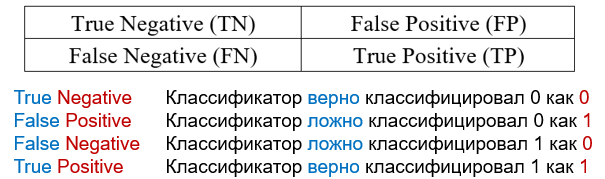

True Negative == предсказан 0 (Negative), и предсказан верно (True)


In [ ]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
print(confusion_matrix(y_true, y_pred))

[[2 1]
 [2 3]]


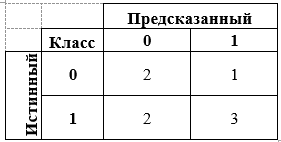

Если количество классов окажется больше 2, например 3 класса.

In [ ]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 1]
print(confusion_matrix(y_true, y_pred))

[[2 0 0]
 [0 1 0]
 [1 0 2]]


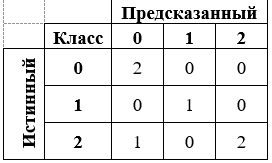

### Формулы метрик

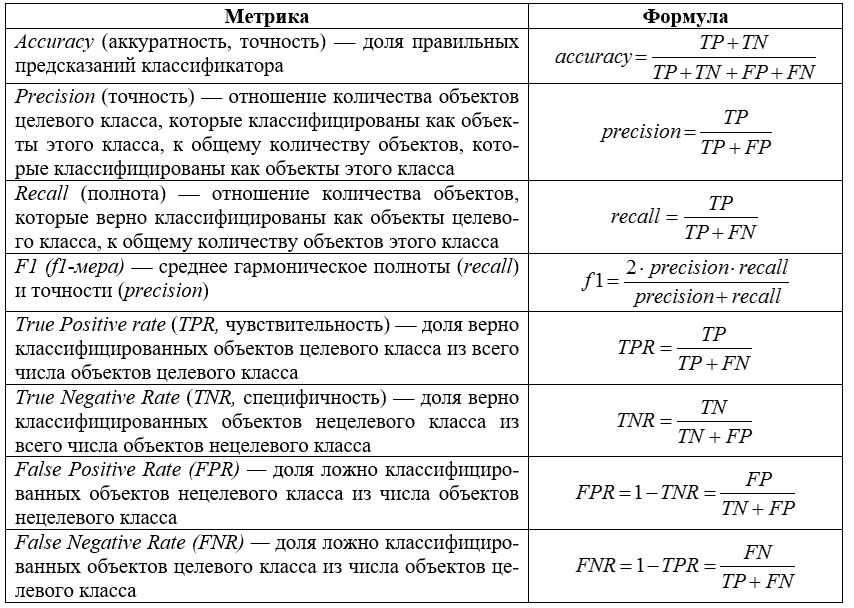

Большое колчество метрик в документации [scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html).

Каждую метрику можно вызвать отдельно:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Рассмотрим пример транзакций по баковской карте. Пусть:

*   класс 1 $-$ транзакция мошенническая (фрод),
*   класс 0 $-$ легальная транзакция.



In [ ]:
y_true = [1, 0, 1, 1, 0, 0]  # Истинные метки классов
y_pred = [0, 0, 1, 1, 0, 0]  # Предсказанные моделью метки классов

print('accuracy=',  round(accuracy_score(y_true, y_pred), 2))
print('precision=', round(precision_score(y_true, y_pred), 2))
print('recall=', round(recall_score(y_true, y_pred), 2))
print('f1=', round(f1_score(y_true, y_pred), 2))


accuracy= 0.83
precision= 1.0
recall= 0.67
f1= 0.8


In [ ]:
y_true = [2, 0, 2]  # Истинные метки классов
y_pred = [0, 0, 2]  # Предсказанные моделью метки классов

print('accuracy=',  round(accuracy_score(y_true, y_pred), 2))
print('precision=', round(precision_score(y_true, y_pred,pos_label=2), 2))
print('recall=', round(recall_score(y_true, y_pred, pos_label=2), 2))
print('f1=', round(f1_score(y_true, y_pred, pos_label=2), 2))


accuracy= 0.67
precision= 1.0
recall= 0.5
f1= 0.67


In [ ]:
y_true = [0, 0, 1, 0, 0]  # Истинные метки классов
y_pred = [0, 0, 0, 0, 0]  # Предсказанные моделью метки классов
print('accuracy=',  round(accuracy_score(y_true, y_pred), 2))
print('precision=', round(precision_score(y_true, y_pred), 2))
print('recall=', round(recall_score(y_true, y_pred), 2))
print('f1=', round(f1_score(y_true, y_pred), 2))

accuracy= 0.8
precision= 0.0
recall= 0.0
f1= 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Для метрики **f1** можно задать усреднение, по умолчанию оно не задано (`None`), что соответсвует значению по умолчанию ‘binary’. Допустимые значения усреднеения:

* **'binary'**: только для случая бинарной классификации. Целевому классу должна соответствовать 1, иначе метку класс необходимо задать черег параметр pos_label.

* **'micro'**: В многоклассвой задаче при подсчитете метрики подчитывает количество всех TP, FP, FN.

* **'macro'**: Метрика вычисляется для каждого класса. Далее находится их невзвешенное среднее, т.е. значения метрики всех классов складывается и делится на количество классов.

* **'weighted'**: Метрика вычисляется для каждого класса. Далее находится их взвешенное среднее, т.е. значения метрики каждого класса умножается на количество экземпляров этого класса (`support`) и делится на количество классов.

* **'samples'**: Применяется только в многометочной классификации. Метрика подсчитывается для кажого экземпляра, потом значения их уcредняются.


Построение матрицы метрик

In [ ]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 1]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.89      0.89      0.87         6
weighted avg       0.89      0.83      0.83         6



              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.89      0.89      0.87         6
weighted avg       0.89      0.83      0.83         6



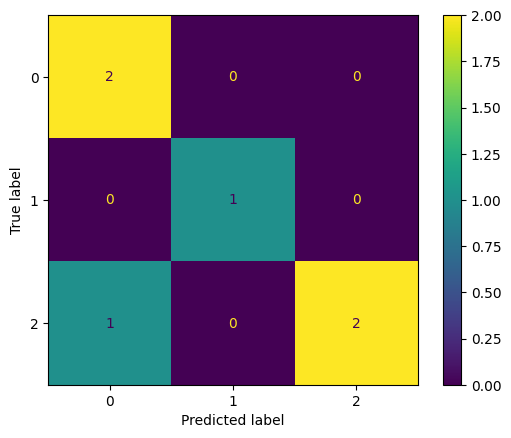

In [ ]:
# Функция для подсчета метрик и создния матрицы ошибок
def get_metrics_plot_confusion_matrix(classes, y_true, y_pred):
  print(classification_report(y_true, y_pred))

  cm = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()

classes = [0, 1, 2]  # Навзания классов, соответсвуют значениям в y
get_metrics_plot_confusion_matrix(classes, y_true, y_pred)

## ROC AUC


*   ROC – receiver operating characteristic («рабочая характеристика приемника»)
*   AUC - area under curve (пллощадь под кривой)






Пример.

*   класс 1 -> мошенническая транзакция
*   класс 0 -> легальная транзакция

Что важнее подвергнуть транзакцию дополнительеной проверке или прпустить мошенническую транзакцию?

Пусть Модель пропустила одну мошенническю транзакцию:



In [ ]:
y_true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Истинные метки классов
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Предсказанные моделью метки классов

from sklearn.metrics import accuracy_score, roc_auc_score
score1 = accuracy_score(y_true, y_pred)
score2 = roc_auc_score(y_true, y_pred)

print('Accuracy: {:.2f}\nROC AUC: {:.2f}'.format(score1,score2))



Accuracy: 0.92
ROC AUC: 0.50


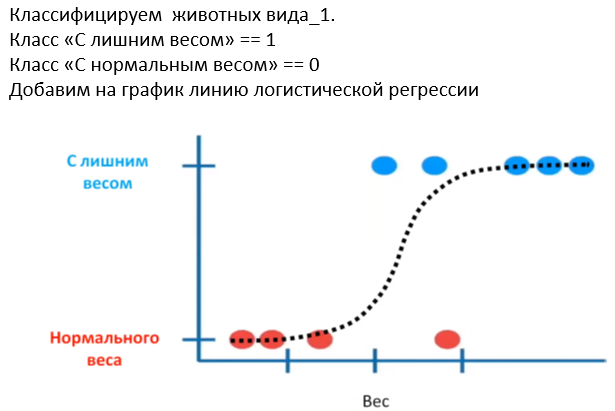

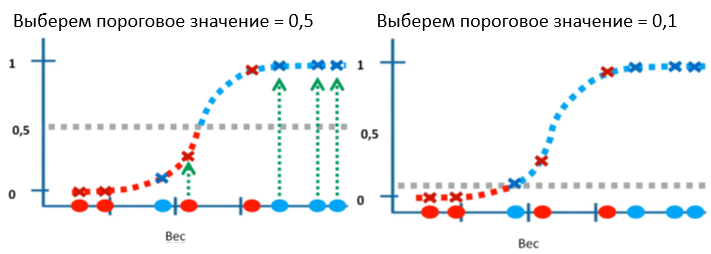

ROC-кривая обобщает все матрицы ошибок, которые созданы каждым пороговым значением. Выбирая разные пороговые значения ставим точки на графике:


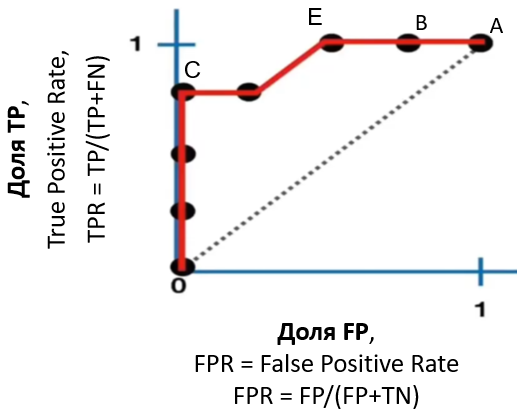

В каждой точке на пунктире: отношенние верно классифицированных объектов с лишним весом к количеству всех объектов с лишним весом равна отношению неверно классифицированных объектов нормального веса к количеству всех объектов норамльного веса.

Точки:

* А(1;1) -> верно классифицировали все объекты с лишним весом и неверно классифицировали все объекты с нормальным весом, т.е. все объекты классифицированы как объекты с лишним весом.
* В (0.75, 1) -> 75% объектов с нормальным весом ложно классифицированы как объекты с лишним весом, верно классифицированы 100% объектов с лишним весом.
* С(0; 0,75) -> нет объектов с нормальным весом ложно классифицированных как объекты с лишним весом и верно классифицированы 75% объектов с лишним весом.
* O(0; 0) -> все объекты признаны объектами с нормальным весом.

В зависимости от постановки задачи выбираем оптимальное пороговое значение, скорее всего это точка C или E.

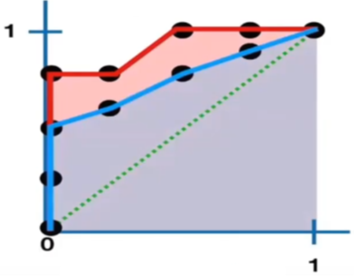

Красная ломаная соответствует реализации ML метода_1, синяя ломаная соответствует реализации ML метода_2. Площадь под красной ломаная больше, поэтому метод_1 обеспечивает результаты классификации лучше, чем метод_2.

Итого:

* ROC помогает выбрать лучшее пороговое значение
* AUC помогает выбрать лучший классификатор


# [top_k_accuracy_score](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.top_k_accuracy_score.html)

Подсчет количества раз, когда требуемая метка класса присутствует среди предсказанных k меток.

`sklearn.metrics.top_k_accuracy_score(y_true, y_score, *, k=2, normalize=True, sample_weight=None, labels=None)`

В бинарном случаеи y_score имееет форму `(n_samples,)`
В многоклассовом случае y_score имеет форму `(n_samples, n_classes)`. Порядок оценок классов в y_score должен соответсвовать порядку меток классов (если заданы) или в алфавитном порядке. Если `y_true` не содержит все возможные метки классов, то они должны быть заданы в `labels`.

Ниже:
y_true $-$ индексы элементов в

In [ ]:
import numpy as np
from sklearn.metrics import top_k_accuracy_score
y_true = np.array([0, 1, 2])

y_score = np.array([[0.3, 0.2, 0.2],  # 0 is in top 2
                    [0.3, 0.4, 0.2],  # 1 is in top 2
                    [0.7, 0.2, 0.1]]) # 2 isn't in top 2
print('y_score[2][2]=0.1, поэтому top_k_accuracy_score =',  top_k_accuracy_score(y_true, y_score, k=2))

y_score = np.array([[0.3, 0.2, 0.2],  # 0 is in top 2
                    [0.3, 0.4, 0.2],  # 1 is in top 2
                    [0.7, 0.2, 0.5]]) # 2 is in top 2
print('y_score[2][2]=0.5, поэтому top_k_accuracy_score =',  top_k_accuracy_score(y_true, y_score, k=2))


y_score[2][2]=0.1, поэтому top_k_accuracy_score = 0.6666666666666666
y_score[2][2]=0.5, поэтому top_k_accuracy_score = 1.0


# Смещение (bias) и разброс (дисперсия, variance).   Недообучение (underfiting), переобучение (overfiting).

**Смещение** — погрешность оценки, возникающая в результате ошибочного предположения в алгоритме обучения. Большое смещение указывает на то, что алгоритм не нашел связь между признаками и выводом (**underfiting**, недообучение).

**Дисперсия** — ошибка чувствительности к малым отклонениям в тренировочном наборе. Высокая дисперсия указывает на то, что алгоритм вопросизводит случайный шум, а не желаемый результат (**overfiting**, переобучение).

**В примере ниже** верным рещением является центральный круг (с самой малой площадью):

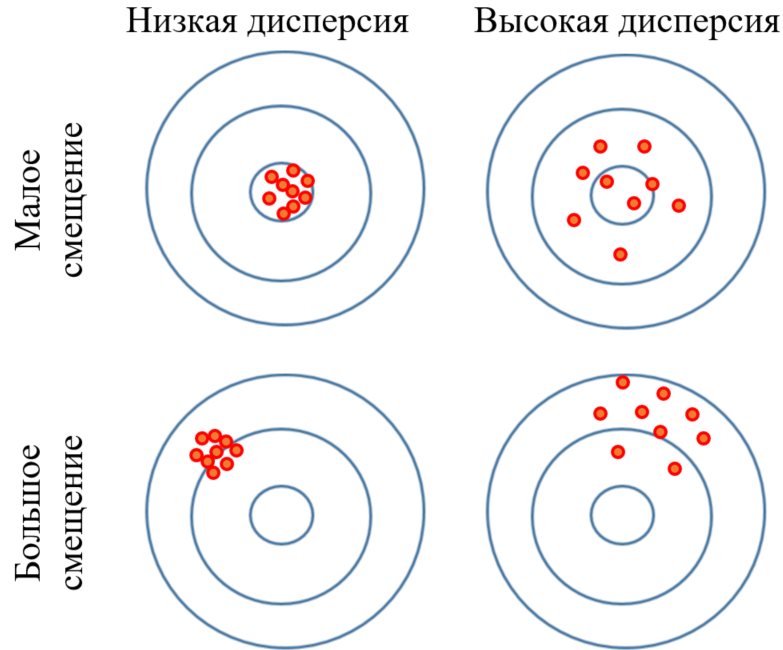

Пример, обучающая выборка


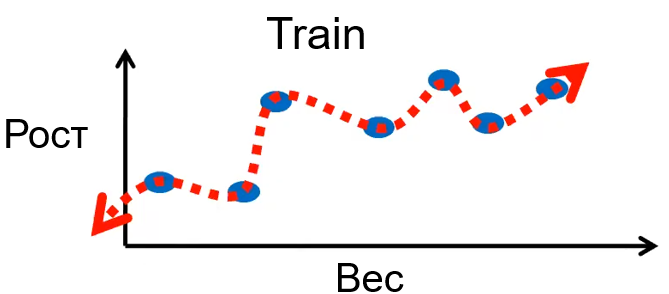

Пример, результат применения оьбученной модели на тестовой выборке:

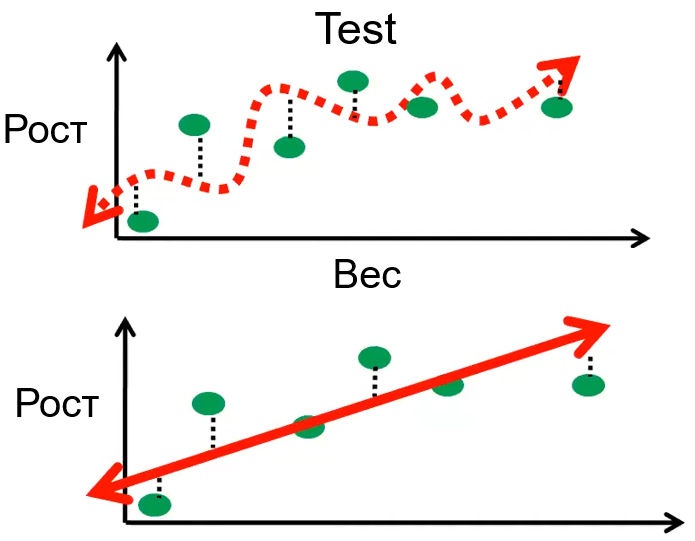

Анализ **ожидаемой ошибки обобщения алгоритма** обучения сведится к сумме трёх членов — **смещения, дисперсии и неустранимой погрешности,** которая является результатом шума в исходных данных.

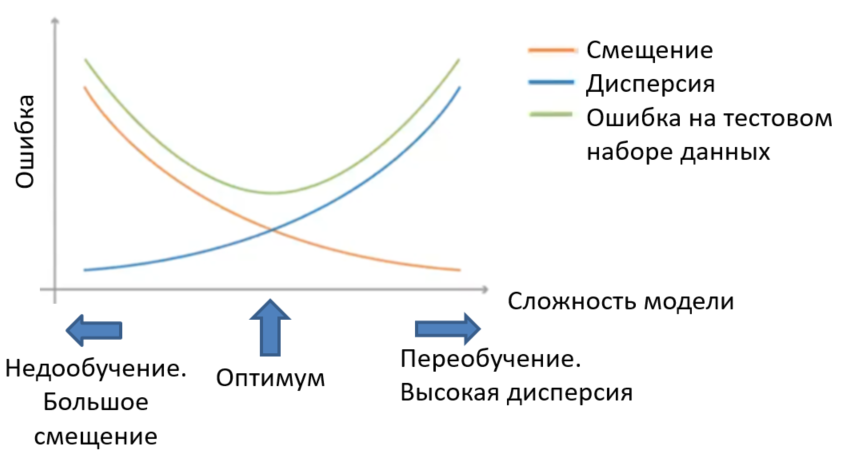

# Метрики обнаружения (детекции) и локализации объекта

### **Intersection over Union, IoU**

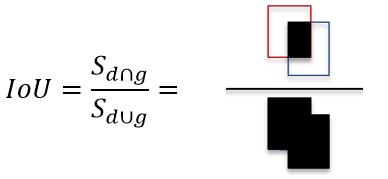

Считается, что объект обнаружен правильно, если доля перекрытия **IoU** обнаруженного (**detection, d**) и размеченного **(groundtruth, g**) окаймляющих прямоугольников превышает пороговое значение **τ**.

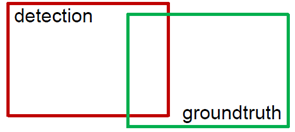

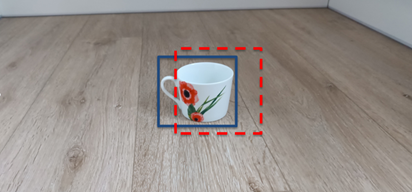

Значение **τ** выбирается, например, из отрезка [0.5; 0.7]

### Показатель числа ложных срабатываний **FDR (false detection rate)** – доля количества ложных срабатываний в количестве всех срабатываний детектора


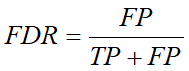



* Объект считается обнаруженным правильно при выполнении тех же условий, что и для TPR.
* Обнаруженный прямоугольник принимается за ложное срабатывание, если ему не нашлась пара из разметки




### Среднее количество ложных срабатываний на изображении **average false positives per frame** – отношение количества ложных срабатываний 𝐹𝑃 к общему числу обработанных изображений 𝑁



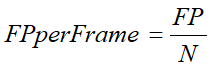

* Объект считается обнаруженным правильно при выполнении тех же условий, что и для TPR
* Показатель интересен при обработке потока изображений, например, видео.


### При подсчете метрик детектирования (нахождения) объекта на изображении используют:

* **TP** — количество верных нахождений объекта с **IoU** ≥ заданного порогового значения **τ**,
* **FP** — количество ложных нахождений объекта (**IoU** < **τ** или несколько детекций одного объекта),
* **FN** — количество ненайденных объектов,
* **TN** — не применяется, т. к. учет этого значения привел бы к необходимости учета всех возможных ограничивающих прямоугольников, которые не соответствуют объекту.




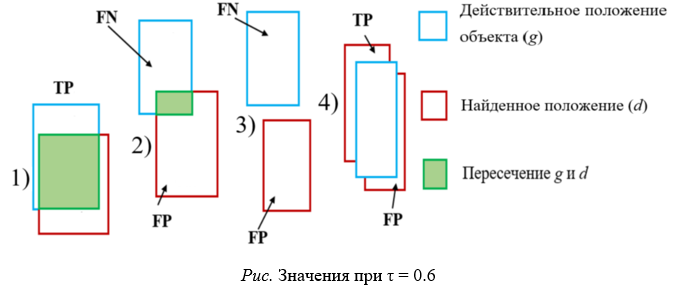

В пункте 4) на рисунке первый найденный ограничивающий прямоугольник, для которого **IoU ≥ τ**, является **TP**, второй прямоугольник с такими же характеристиками является **FP**, т. к. они соответствуют одному объекту.

### Средняя точность предсказания **mean average precision (mAP)**:

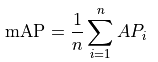

где, AP - площадь под  precision-recall кривой:

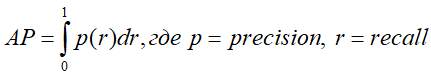

Пример. Необходимо найти яблоки на изображении.

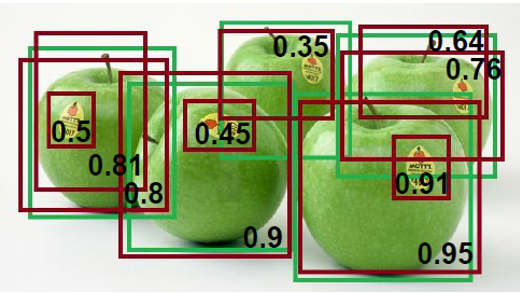

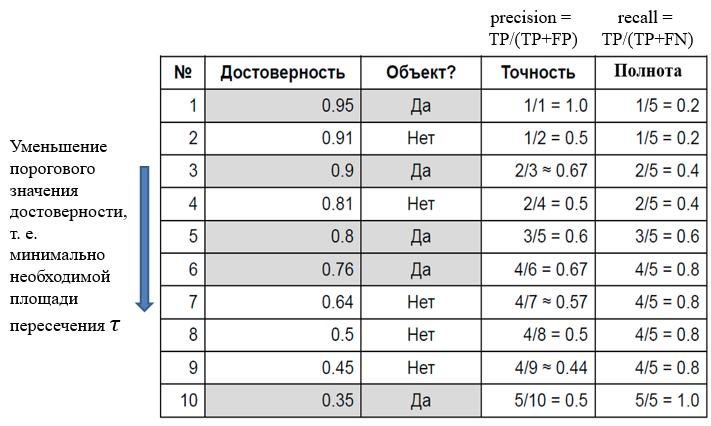

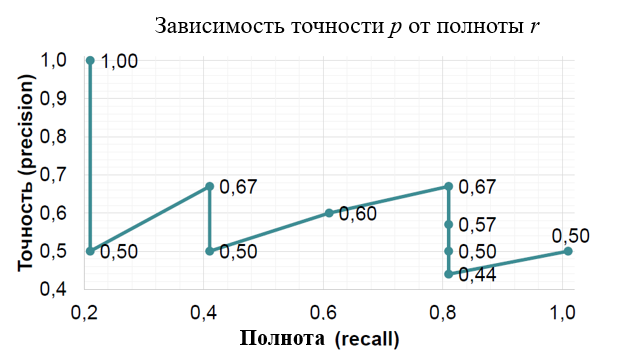

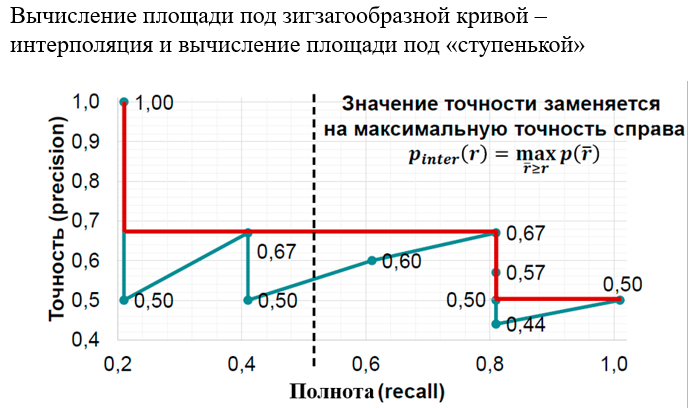

Расссмаотриваются 11 значений полноты recall = 0, 0.1, 0.2, ..., 1.

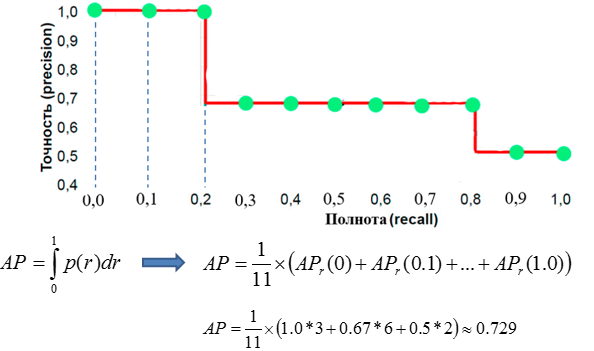

**mAP – среднее AP по всем классам**.

$mAP = 1/n * sum(AP_i)$, где $n -$ количество классов.

# Метрики регрессии. (Только для курса Анализа данных)

* $a(x_i)\ -$ прогноз модели,
* $y_i\ -$ экспериментальные данные.


**Средняя квадратичная ошибка (Mean Squared Error, MSE)** применяется, когда  важны большие ошибки (выбросы) и надо выбрать модель, обеспечивающую меньше больших ошибок прогноза. Возведение в квадрат увеличивает значимость больших ошибок.

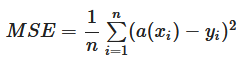
       
**Средняя абсолютная ошибка (Mean Absolute Error, MAE)**

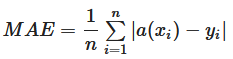

Среднеквадратичная ошибка без анализа самих данных не позволяет сделать вывод о том, на сколько хорошо модель решает задачу. Например, MSE = 10 $-$ плохой показатель, если целевая переменная $\epsilon\ [0, 1]$, и это хороший показатель, если целевая переменная $\epsilon\ [1000, 100000]$.

**Коэффициент детерминации — $R^2$**

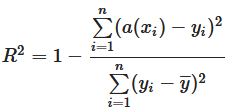

Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной.
* Если $R^2 ≈ 1$, то модель хорошо объясняет данные.
* если $R^2 ≈ 0$, то то модель плохо объясняет данные,


**Средняя абсолютная процентная ошибка (Mean Absolute Percentage Error, MAPE)**

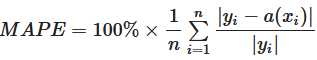

Например, MAPE=15.1% означает, что ошибка составила 15,1% от фактических значений.

** Корень из средней квадратичной ошибки (Root Mean Squared Error, RMSE)**

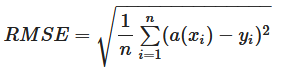    

Корень из MSE. Любое небольшое отклонение может значительно повлиять на показатель ошибки.

# Метрики кластеризации

Например, по [ссылке](https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/#clustering-metrics)

# Метрики ранжирования

Напрмиер, по [ссылке](https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/#multilabel-ranking-metrics)